In [54]:
import pandas as pd

# Load the dataset from a CSV file
boston_df = pd.read_csv('D:/Master Degree at NYCU/1. Slides and Homeworks/Spring_2024/1. FinTech/JN/Boston.csv')

boston_data = boston_df.drop(boston_df.columns[0], axis=1)

# Display the first few rows of the dataset
print(boston_data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [66]:
# Check the dimensions of the dataset (number of rows and columns)
print(f"Boston dataset has {boston_data.shape[0]} rows and {boston_data.shape[1]} columns.", end='\n\n')

# Check the column names to understand what each represents
print(f"Each row represents a suburb in Boston.", end='\n\n')
print(boston_data.columns, end='\n\n')

print(boston_data.describe())

Boston dataset has 506 rows and 14 columns.

Each row represents a suburb in Boston.

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis        

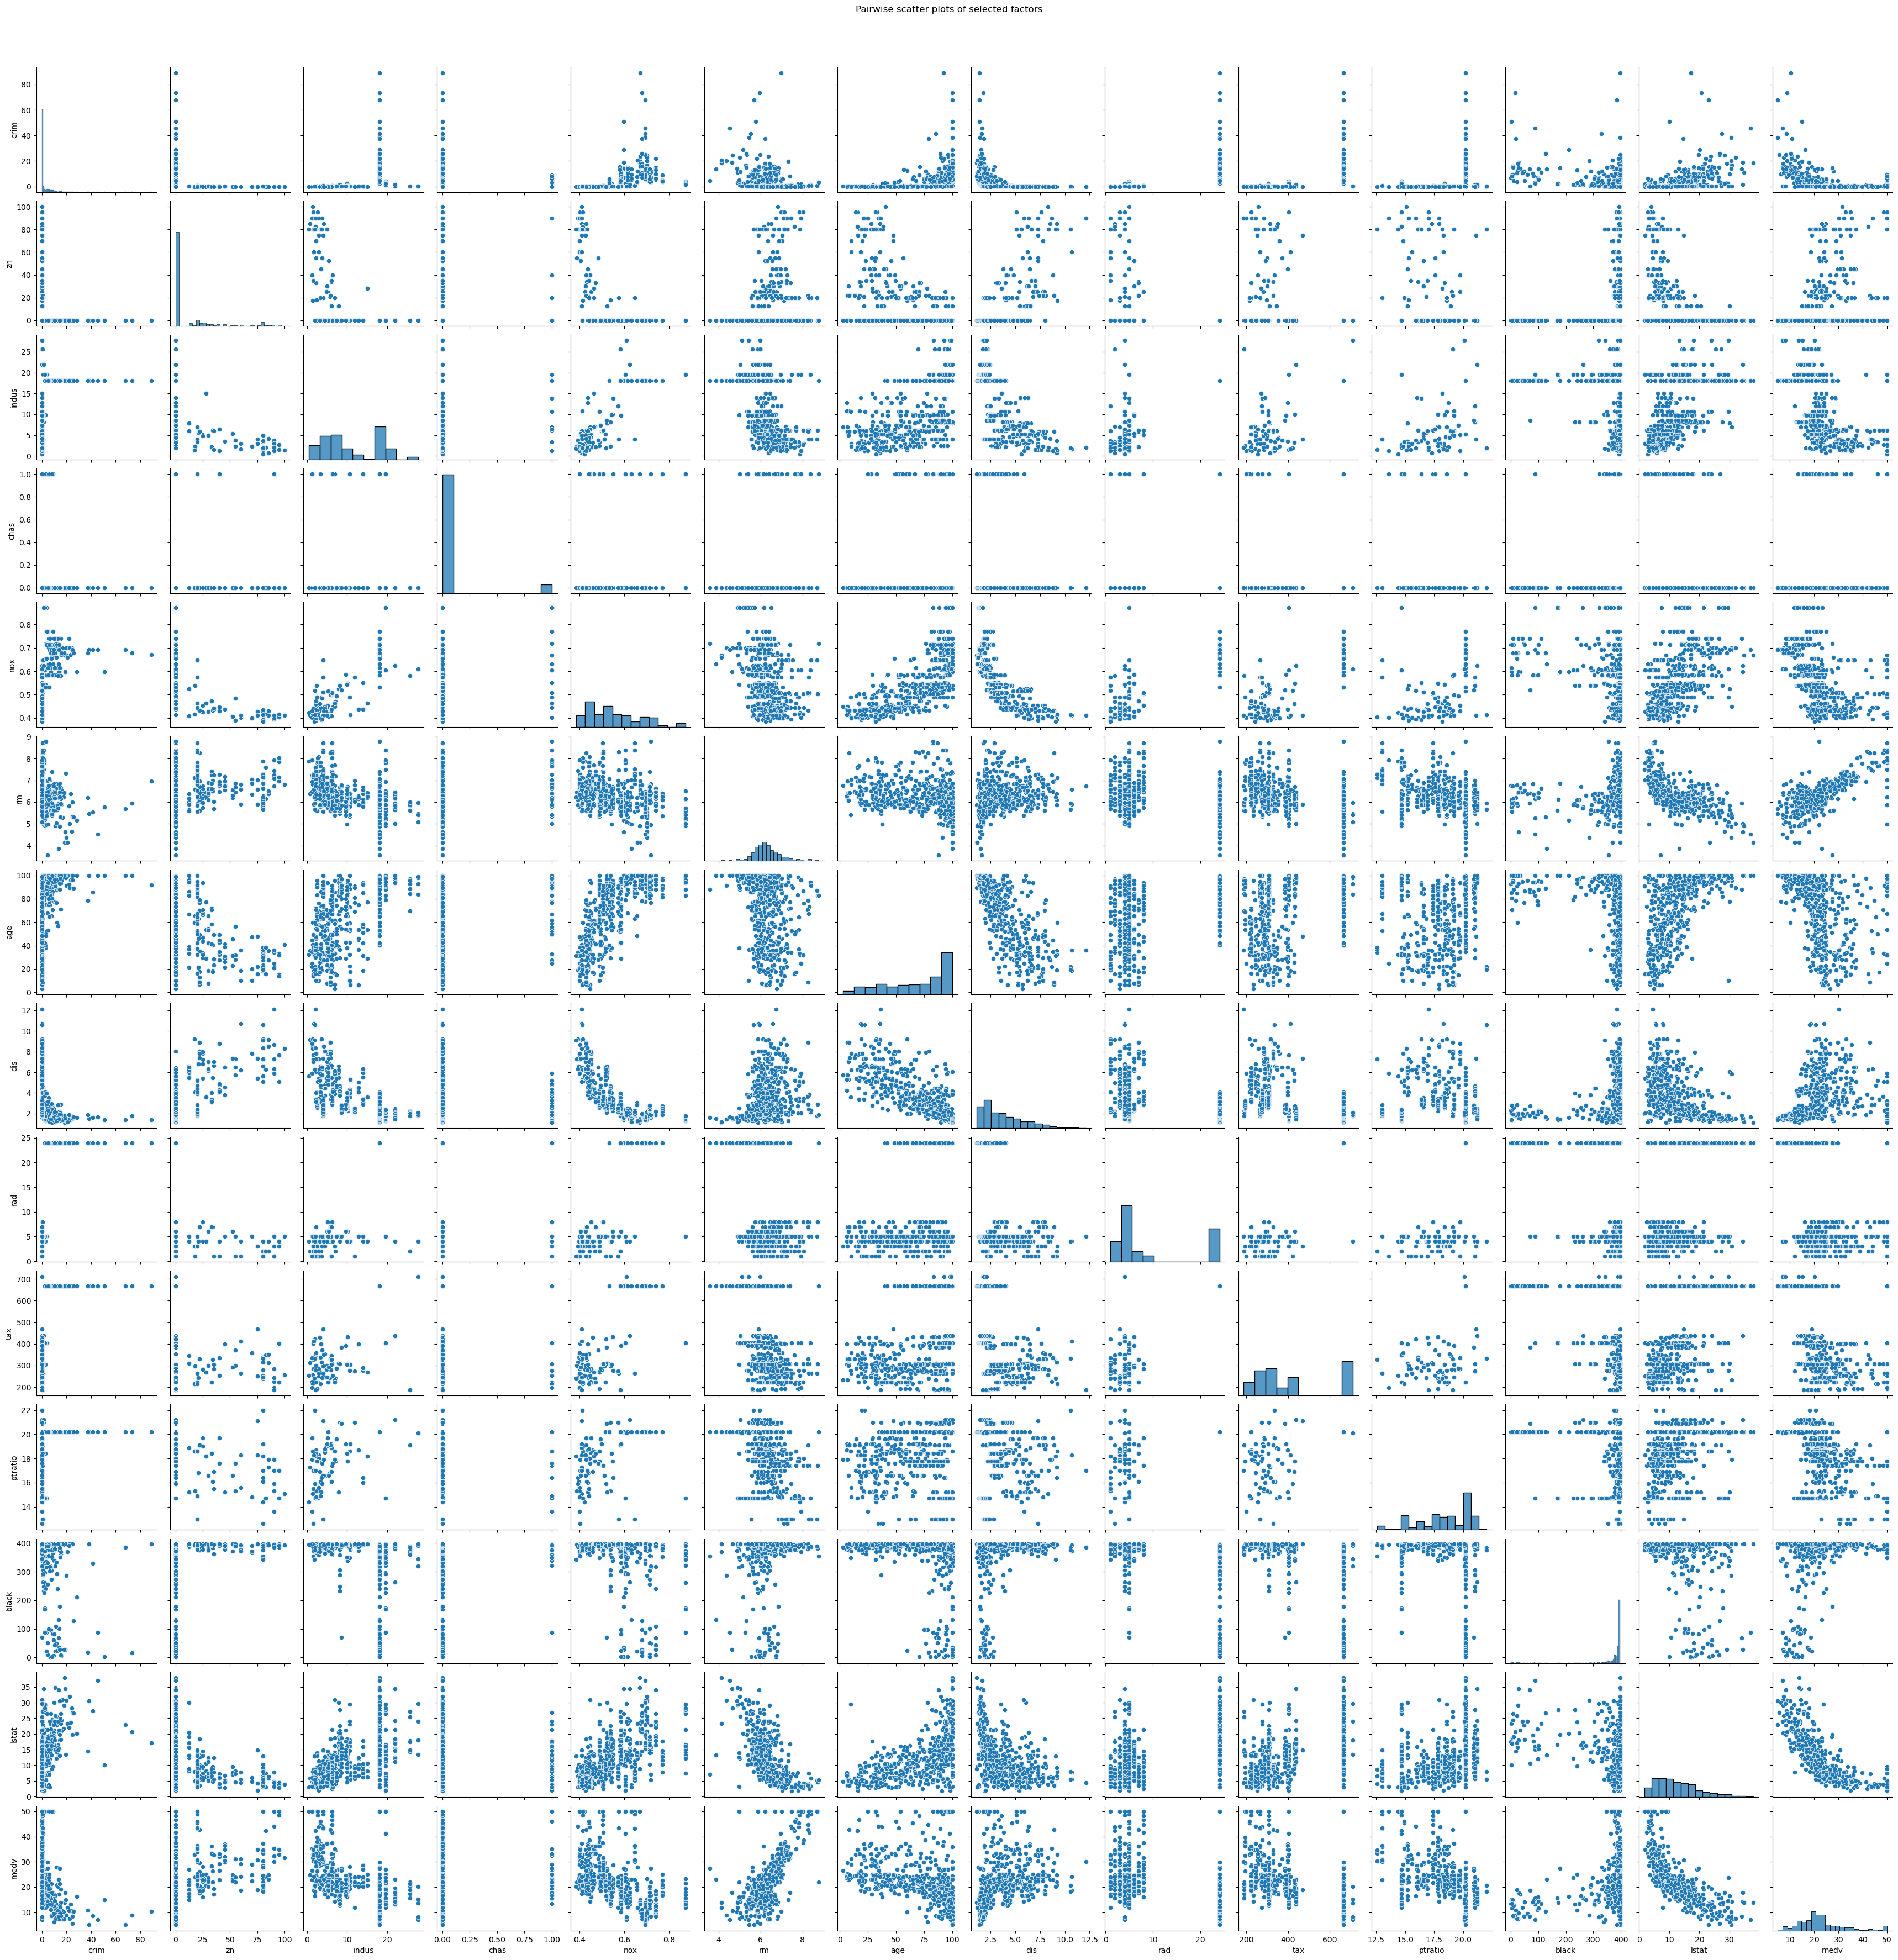

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairwise scatter plots for all selected factors in the Boston dataset
sns.pairplot(boston_data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']])  # Replace with columns of your choice
plt.suptitle('Pairwise scatter plots of selected factors', y=1.02)
plt.show()

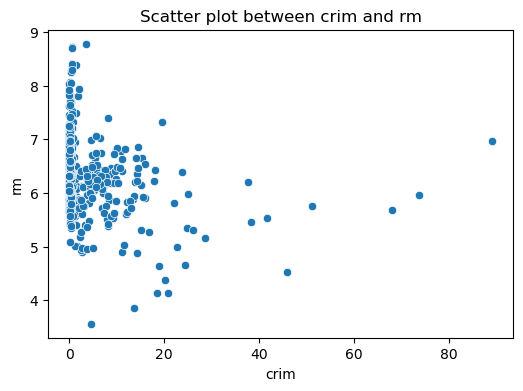

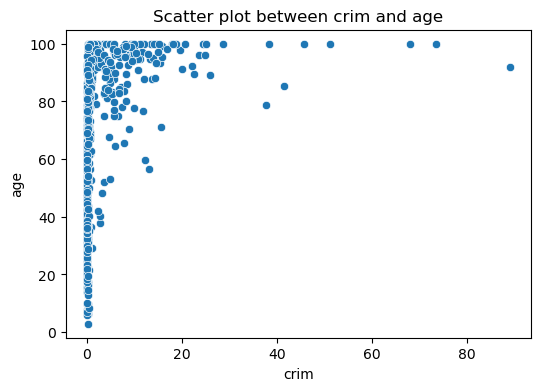

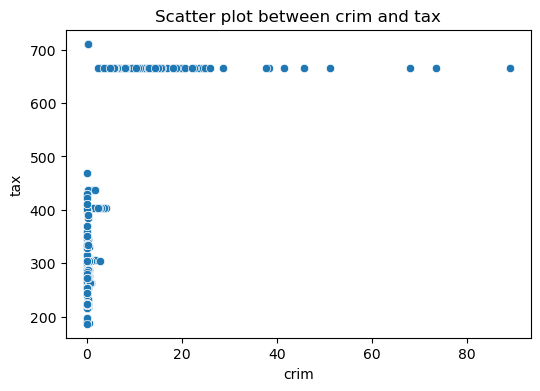

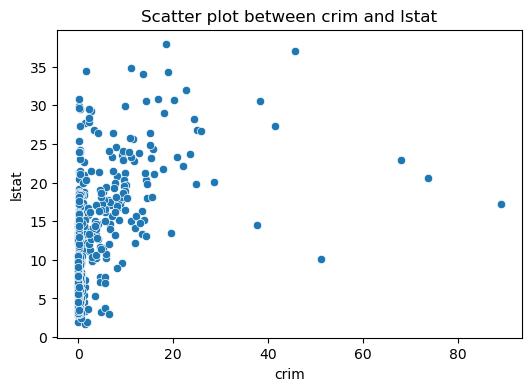

In [72]:
# Each tuple represents a (x-axis, y-axis) pair
pairs = [('crim', 'rm'), ('crim', 'age'), ('crim', 'tax'), ('crim', 'lstat')]

# Loop through each pair and plot the scatter plot
for x_col, y_col in pairs:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.scatterplot(data=boston_data, x=x_col, y=y_col)
    plt.title(f'Scatter plot between {x_col} and {y_col}')
    plt.show()

In [76]:
# Calculate the correlation matrix
correlation_matrix = boston_data.corr()

# Extract correlations for CRIM with other predictors
crim_correlations = correlation_matrix['crim'].sort_values(ascending=False)

# Display correlations for CRIM
print("Correlation of CRIM with other factors:")
print(crim_correlations)


Correlation of CRIM with other factors:
crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
black     -0.385064
medv      -0.388305
Name: crim, dtype: float64


In [78]:
# Find the max, min, and median for each predictor of interest
summary_stats = boston_data[['crim', 'tax', 'ptratio']].agg(['min', 'max', 'median', 'mean'])
print("Summary statistics for crim, tax, and ptratio:")
print(summary_stats)

# Find suburbs with particularly high values for each factor (top 5 highest for each)
high_crime_suburbs = boston_data[['crim']].sort_values(by='crim', ascending=False).head(5)
high_tax_suburbs = boston_data[['tax']].sort_values(by='tax', ascending=False).head(5)
high_ptratio_suburbs = boston_data[['ptratio']].sort_values(by='ptratio', ascending=False).head(5)

print("\nTop 5 suburbs with highest crime rates (crim):")
print(high_crime_suburbs)

print("\nTop 5 suburbs with highest tax rates (tax):")
print(high_tax_suburbs)

print("\nTop 5 suburbs with highest pupil-teacher ratios (ptratio):")
print(high_ptratio_suburbs)

Summary statistics for crim, tax, and ptratio:
             crim         tax    ptratio
min      0.006320  187.000000  12.600000
max     88.976200  711.000000  22.000000
median   0.256510  330.000000  19.050000
mean     3.613524  408.237154  18.455534

Top 5 suburbs with highest crime rates (crim):
        crim
380  88.9762
418  73.5341
405  67.9208
410  51.1358
414  45.7461

Top 5 suburbs with highest tax rates (tax):
     tax
492  711
491  711
490  711
489  711
488  711

Top 5 suburbs with highest pupil-teacher ratios (ptratio):
     ptratio
354     22.0
355     22.0
135     21.2
127     21.2
136     21.2


In [82]:
# Count how many suburbs bound the Charles River (CHAS = 1)
charles_river_count = boston_data['chas'].sum()

print(f"Number of suburbs that bound the Charles River: {charles_river_count}")

Number of suburbs that bound the Charles River: 35


In [84]:
# Calculate the median pupil-teacher ratio (PTRATIO)
median_ptratio = boston_data['ptratio'].median()

print(f"The median pupil-teacher ratio among the towns is: {median_ptratio}")

The median pupil-teacher ratio among the towns is: 19.05


In [86]:
# Find the suburb with the lowest median home value (MEDV)
lowest_medv_suburb = boston_data[boston_data['medv'] == boston_df['medv'].min()]

print("Suburb with the lowest median value of owner-occupied homes:")
print(lowest_medv_suburb)

# Display the values of other predictors for that suburb
print("\nValues of the other predictors for the suburb with the lowest MEDV:")
print(lowest_medv_suburb.iloc[0])

# Compare with the overall ranges for each predictor
summary_stats = boston_data.agg(['min', 'max', 'median', 'mean'])
print("\nSummary statistics (min, max, median, mean) for all predictors:")
print(summary_stats)

Suburb with the lowest median value of owner-occupied homes:
        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio   black  lstat  medv  
398     20.2  396.90  30.59   5.0  
405     20.2  384.97  22.98   5.0  

Values of the other predictors for the suburb with the lowest MEDV:
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

Summary statistics (min, max, median, mean) for all predictors:
             crim          zn      indus     chas       nox        rm  \
min      0.006320    0.000000   0.460000  0.00000  0.385000  3.561000   
max     88.976200  100.00

In [90]:
# Count suburbs with more than seven rooms per dwelling
more_than_seven_rooms = boston_data[boston_data['rm'] > 7].shape[0]

# Count suburbs with more than eight rooms per dwelling
more_than_eight_rooms = boston_data[boston_data['rm'] > 8].shape[0]

print(f"Number of suburbs averaging more than seven rooms per dwelling: {more_than_seven_rooms}")
print(f"Number of suburbs averaging more than eight rooms per dwelling: {more_than_eight_rooms}")

# Identify suburbs averaging more than eight rooms per dwelling
suburbs_more_than_eight = boston_data[boston_data['rm'] > 8]

print("\nSuburbs that average more than eight rooms per dwelling:")
print(suburbs_more_than_eight[['rm', 'crim', 'tax', 'ptratio']])  # Display relevant predictors

Number of suburbs averaging more than seven rooms per dwelling: 64
Number of suburbs averaging more than eight rooms per dwelling: 13

Suburbs that average more than eight rooms per dwelling:
        rm     crim  tax  ptratio
97   8.069  0.12083  276     18.0
163  8.375  1.51902  403     14.7
204  8.034  0.02009  224     14.7
224  8.266  0.31533  307     17.4
225  8.725  0.52693  307     17.4
226  8.040  0.38214  307     17.4
232  8.337  0.57529  307     17.4
233  8.247  0.33147  307     17.4
253  8.259  0.36894  330     19.1
257  8.704  0.61154  264     13.0
262  8.398  0.52014  264     13.0
267  8.297  0.57834  264     13.0
364  8.780  3.47428  666     20.2
